0 : 764.987381818
eta:  1e-06

200 : 3697.61467284
eta:  5.467890530131009e-07

400 : 416.97942824
eta:  2.001424772569596e-07

600 : 108.196672209
eta:  1.634780443018583e-07

800 : 1.95232730663
eta:  1.092520061505241e-07

----------------------
Final error 1.25700906047
Final w's w0:  1.99422543894 w1:  0.967638576464 w2:  -0.0483519865733 w3:  0.00132152992076


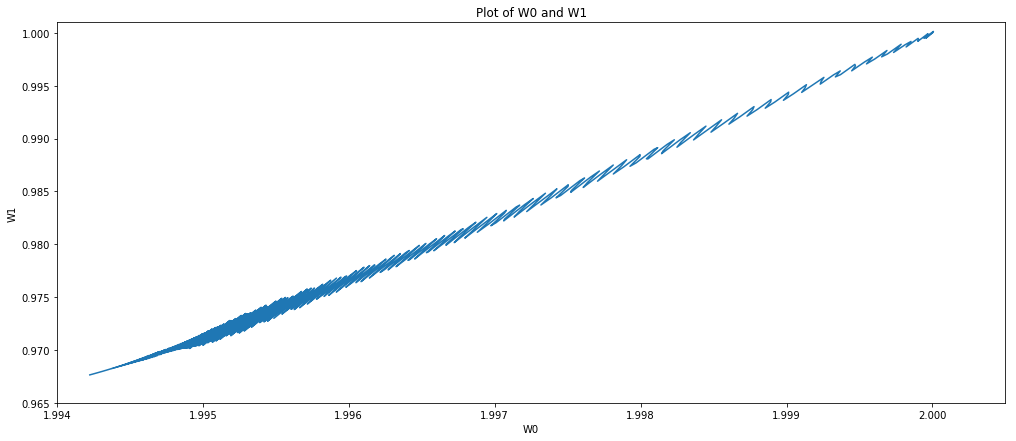

In [8]:
#Ahmet Can Ersöz
#2016719051

%matplotlib inline
import matplotlib.pylab as plt

import time
from IPython import display
import numpy as np


#y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
#y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
N = len(x)

# Design matrix
A = np.vstack((np.ones(N), x, x**2, x**3)).T

# Learning rate

eta = 0.000001
p = np.zeros(4)
beta = 0.95
prev_E = 0.
E = 0.
              
# initial parameters
w = np.array([2., 1., 0.1, 0.01])
EPOCHS = 1000

w_all = np.zeros((4,EPOCHS))

for epoch in range(EPOCHS):
    # Error
    err = y-A.dot(w)
    
    # Total error
    prev_E = E
    E = np.sum(err**2)/N
    
    #The following if part added    
    if epoch > 0:
        if prev_E < E:
            eta = eta * 0.9  
        else:
            eta = eta * 1.1
            min_E = E 
     
    
    # Gradient
    dE = -2.*A.T.dot(err)/N
    p = dE + beta*p
    
    if epoch%200 == 0: 
        print(epoch,':',E)
    #    print("w0: ", w[0], " - w1: ", w[1], " - w2: ", w[2], " - w3: ", w[3])   
        print("eta: ", eta)   
        print("")  
    
    
    w_all[:,epoch] = w

    # Perfom one descent step
    w = w - eta*p
    #w = w - eta*dE

#plt.plot([1.9, 2.3, 2.7, 3.1],[0.3, 0.7, 1.1, 1.4])
plt.figure(figsize=(17, 7))
plt.plot(w_all[0,:],w_all[1,:])
plt.xlim((1.994,2.0005))
plt.ylim((0.965,1.001))
plt.xlabel("W0")
plt.ylabel("W1")
plt.title("Plot of W0 and W1")
 
  
print("----------------------")  
print("Final error",E)
print("Final w's w0: ", w[0], "w1: ", w[1], "w2: ", w[2], "w3: ", w[3])

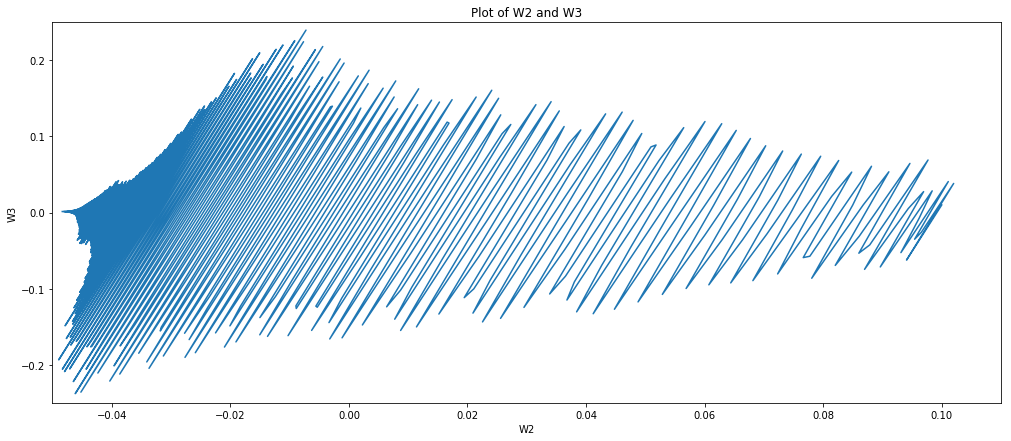

In [9]:
plt.figure(figsize=(17, 7))
plt.plot(w_all[2,:],w_all[3,:])
plt.xlim((-0.05,0.11))
plt.ylim((-0.25,0.25))
plt.xlabel("W2")
plt.ylabel("W3")
plt.title("Plot of W2 and W3")